<a href="https://colab.research.google.com/github/LuciferX45/Deep-Learning-Labs/blob/main/DL_LAB8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DL LAB 8**
# **Gautam Padhi**
# I034 B2
# BTech AI SEM V


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
validation_path = "/content/drive/MyDrive/DL/v_data/test"
train_path = "/content/drive/MyDrive/DL/v_data/train"

In [ ]:
img_width,img_height = 224,224

In [ ]:
train_samples = 100
validation_samples = 100

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_preprocess = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.25,horizontal_flip=True)

In [ ]:
test_preprocess = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_data = train_preprocess.flow_from_directory(train_path,target_size=(img_width,img_height),batch_size = 16,class_mode = "binary")

Found 399 images belonging to 2 classes.


In [ ]:
train_data

In [ ]:
train_data[0][0].shape #16 batches of 224x224x3 images

(16, 224, 224, 3)

In [ ]:
train_data[0][0][0].shape

(224, 224, 3)

In [ ]:
test_data = test_preprocess.flow_from_directory(validation_path,target_size=(img_width,img_height),batch_size = 16,class_mode = "binary")

Found 100 images belonging to 2 classes.


In [ ]:
test_data[0][0].shape #16 batches of 224x224x3 images

(16, 224, 224, 3)

In [ ]:
test_data[0][0][0].shape

(224, 224, 3)

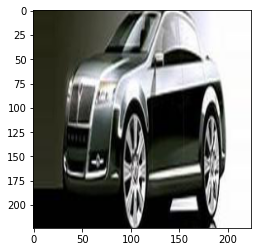

In [ ]:
plt.imshow(train_data[0][0][0])

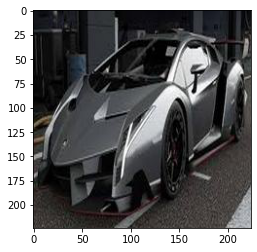

In [ ]:
plt.imshow(test_data[0][0][0])

In [ ]:
import keras
lenet_5_model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=5, strides=1,  activation='relu', input_shape=train_data[0][0][0].shape , padding='same'), #C1
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(64, kernel_size=5, strides=1, activation='relu'), #C3
    keras.layers.AveragePooling2D(), #S4
    keras.layers.Conv2D(128, kernel_size=5, strides=1, activation='relu'), #C5
    keras.layers.Flatten(), #Flatten    
    keras.layers.Dense(84, activation='sigmoid'), #F6
    keras.layers.Dense(1, activation='sigmoid') #Output layer
])

In [ ]:
lenet_5_model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])
lenet_5_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      2432      
                                                                 
 average_pooling2d (AverageP  (None, 112, 112, 32)     0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 64)      51264     
                                                                 
 average_pooling2d_1 (Averag  (None, 54, 54, 64)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 128)       204928    
                                                                 
 flatten (Flatten)           (None, 320000)            0

In [ ]:
history = lenet_5_model.fit(train_data,epochs = 15,validation_data=test_data)

Epoch 1/15
25/25 [==============================] - 115s 4s/step - loss: 2.1930 - accuracy: 0.5363 - val_loss: 2.1875 - val_accuracy: 0.5000
Epoch 2/15
25/25 [==============================] - 87s 3s/step - loss: 1.9389 - accuracy: 0.5013 - val_loss: 1.6920 - val_accuracy: 0.5000
Epoch 3/15
25/25 [==============================] - 87s 3s/step - loss: 1.4701 - accuracy: 0.5013 - val_loss: 1.2477 - val_accuracy: 0.5000
Epoch 4/15
25/25 [==============================] - 87s 3s/step - loss: 1.1049 - accuracy: 0.5013 - val_loss: 0.9528 - val_accuracy: 0.5000
Epoch 5/15
25/25 [==============================] - 85s 3s/step - loss: 0.8607 - accuracy: 0.5013 - val_loss: 0.8172 - val_accuracy: 0.5000
Epoch 6/15
25/25 [==============================] - 87s 3s/step - loss: 0.7501 - accuracy: 0.5063 - val_loss: 0.6999 - val_accuracy: 0.5000
Epoch 7/15
25/25 [==============================] - 87s 3s/step - loss: 0.6951 - accuracy: 0.4937 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 8/15
25/25 [=